# Task
analyze this dataset as a professional data scientist

Here is all the data you need:
"job_description.csv"

## Data loading

### Subtask:
Load the "job_description.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the data from "job_description.csv" into a pandas DataFrame and display its first and last few rows along with its shape.



In [1]:
import pandas as pd
!pip install nltk.download('punkt_tab')

try:
    df = pd.read_csv('job_description.csv')
    display(df.head())
    display(df.tail())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'job_description.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 'utf-8' codec can't decode byte 0x92 in position 1519: invalid start byte


ERROR: Invalid requirement: "nltk.download('punkt_tab')": Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    nltk.download('punkt_tab')
                 ~^


**Reasoning**:
The error message indicates a decoding issue with the CSV file.  Let's try specifying a different encoding, such as 'latin-1', which is often used for files with Western European characters.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('job_description.csv', encoding='latin-1')
    display(df.head())
    display(df.tail())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'job_description.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Job Title,Job Description,Unnamed: 2
0,Software Engineer,Description:\nWe are seeking a skilled Softwa...,
1,Data Scientist,Job Description:\nWe are looking for a skilled...,NaN
2,Product Manager,Description:\nWe are seeking an innovative and...,NaN
3,Cloud Engineer,Description:\nWe are looking for a skilled Clo...,NaN
4,Cybersecurity Analyst,Description:\nWe are looking for a skilled Cyb...,NaN


,Job Title,Job Description,Unnamed: 2
15,Business Intelligence Analyst,Description:\nAnalyze business data to identif...,NaN
16,Robotics Engineer,Description:\nWe are seeking an innovative Rob...,NaN
17,Embedded Systems Engineer,Description:\nDesign and develop software for ...,NaN
18,Quality Assurance Engineer,Description:\nEnsure the quality and reliabili...,NaN
19,UX/UI Designer,Description:We are seeking a creative and deta...,NaN


(20, 3)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify data types, check for missing values, and examine the distribution of key variables.


**Reasoning**:
I need to explore the dataset's structure, identify data types, check for missing values, and examine the distribution of key variables as instructed.



In [3]:
# Data Shape and Info
print("Data Shape:", df.shape)
df.info()

# Missing Values
print("\nMissing Values per column:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Unique Values and Job Description Analysis
for col in ['Job Title', 'Job Description', 'Unnamed: 2']:
    print(f"\nUnique values in '{col}':")
    if col == 'Job Description':
        print(f"Number of unique Job Descriptions: {df['Job Description'].nunique()}")
        print(f"Average length of Job Descriptions: {df['Job Description'].str.len().mean()}")
        print(df['Job Description'].value_counts().head())
    else:
        print(df[col].value_counts())

    if col == 'Unnamed: 2':
        print(f"Unique values in 'Unnamed: 2' excluding NaN: {df['Unnamed: 2'].dropna().unique()}")

# Data Type Considerations
print("\nData Types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")
    if df[col].dtype == 'object':
        try:
            converted_col = pd.to_numeric(df[col], errors='coerce')
            print(f"Potential numeric column '{col}' converted:")
            print(converted_col.describe())
            print(f"Number of non-numeric values in '{col}': {(df[col] != converted_col).sum()}")
        except Exception as e:
            print(f"Could not convert '{col}' to numeric: {e}")

Data Shape: (20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        20 non-null     object
 1   Job Description  20 non-null     object
 2   Unnamed: 2       1 non-null      object
dtypes: object(3)
memory usage: 612.0+ bytes

Missing Values per column:
 Job Title           0
Job Description     0
Unnamed: 2         19
dtype: int64

Descriptive Statistics:
                 Job Title                                    Job Description  \
count                  20                                                 20   
unique                 20                                                 20   
top     Software Engineer   Description:\nWe are seeking a skilled Softwa...   
freq                    1                                                  1   

       Unnamed: 2  
count           1  
unique          1  
top          

## Data cleaning

### Subtask:
Clean the DataFrame `df` by handling missing values and removing the 'Unnamed: 2' column.


**Reasoning**:
Clean the DataFrame `df` by removing the 'Unnamed: 2' column, handling missing values in 'Job Title' and 'Job Description' (if any), verifying data types, and removing duplicate rows.



In [4]:
# Remove the 'Unnamed: 2' column
df = df.drop(columns=['Unnamed: 2'], errors='ignore')

# Check for missing values in 'Job Title' and 'Job Description' and remove rows with missing values if found.
if df['Job Title'].isnull().any() or df['Job Description'].isnull().any():
    df = df.dropna(subset=['Job Title', 'Job Description'])

# Verify data types
print("\nData Types after cleaning:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")
    if col in ['Job Title', 'Job Description']:
        if df[col].dtype not in ['object', 'string']:
            print(f"Warning: '{col}' is not of type 'object' or 'string'.")

# Remove duplicate rows
df = df.drop_duplicates()
display(df)


Data Types after cleaning:
Job Title: object
Job Description: object


,Job Title,Job Description
0,Software Engineer,Description:\nWe are seeking a skilled Softwa...
1,Data Scientist,Job Description:\nWe are looking for a skilled...
2,Product Manager,Description:\nWe are seeking an innovative and...
3,Cloud Engineer,Description:\nWe are looking for a skilled Clo...
4,Cybersecurity Analyst,Description:\nWe are looking for a skilled Cyb...
5,Machine Learning Engineer,Description:\nWe are looking for a skilled Mac...
6,DevOps Engineer,Description:\nWe are seeking a skilled DevOps ...
7,Full Stack Developer,Description:\nWe are looking for a skilled Ful...
8,Big Data Engineer,Description:\nWe are seeking a skilled Big Dat...
9,AI Researcher,Description:\nWe are seeking an innovative AI ...


## Data wrangling

### Subtask:
Transform the job descriptions in the 'Job Description' column of the DataFrame `df` for analysis.


**Reasoning**:
Perform text cleaning, tokenization, stemming/lemmatization, and optionally TF-IDF vectorization on the 'Job Description' column.



In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords', quiet=True)
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    try:
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        tokens = nltk.word_tokenize(text)
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {e}")
        return ""  # Return an empty string in case of error

df['Cleaned_Job_Description'] = df['Job Description'].apply(clean_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Experiment with max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Job_Description'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EENUNISHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\EENUNISHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Reasoning**:
Download the missing 'punkt_tab' resource using nltk.download().



In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EENUNISHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Reasoning**:
Retry the text processing and TF-IDF vectorization after downloading the punkt resource.



In [7]:
import re
import nltk
nltk.download('punkt_tb')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned_Job_Description'] = df['Job Description'].apply(clean_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Experiment with max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Job_Description'])

[nltk_data] Error loading punkt_tb: Package 'punkt_tb' not found in
[nltk_data]     index


**Reasoning**:
The error message still indicates that `punkt_tab` is missing, even after downloading `punkt`.  I will try downloading `punkt_tab` explicitly.



In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\EENUNISHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Reasoning**:
Retry the text processing and TF-IDF vectorization after downloading punkt_tab.



In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned_Job_Description'] = df['Job Description'].apply(clean_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Experiment with max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Job_Description'])

## Feature engineering

### Subtask:
Engineer new features from the existing data, specifically focusing on the job titles and descriptions.


**Reasoning**:
Create the 'Seniority' column based on keywords in 'Job Title' and create binary columns for specific skills based on keywords in 'Cleaned_Job_Description'.



In [10]:
import re

def extract_seniority(title):
    title = title.lower()
    if 'junior' in title or 'jr' in title:
        return 'Junior'
    elif 'senior' in title or 'sr' in title or 'lead' in title or 'principal' in title or 'director' in title:
        return 'Senior'
    else:
        return 'Mid'

df['Seniority'] = df['Job Title'].apply(extract_seniority)

def extract_skill(description, skill):
    if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE):
        return 1
    else:
        return 0

skills = ['Python', 'Java', 'Machine Learning', 'Data Science']
for skill in skills:
    df[skill] = df['Cleaned_Job_Description'].apply(lambda x: extract_skill(x, skill))

display(df.head())

,Job Title,Job Description,Cleaned_Job_Description,Seniority,Python,Java,Machine Learning,Data Science
0,Software Engineer,Description:\nWe are seeking a skilled Softwa...,descript seek skill softwar engin design devel...,Mid,1,1,0,0
1,Data Scientist,Job Description:\nWe are looking for a skilled...,job descript look skill data scientist analyz ...,Mid,1,0,0,0
2,Product Manager,Description:\nWe are seeking an innovative and...,descript seek innov strateg product manag lead...,Mid,0,0,0,0
3,Cloud Engineer,Description:\nWe are looking for a skilled Clo...,descript look skill cloud engin design impleme...,Mid,1,0,0,0
4,Cybersecurity Analyst,Description:\nWe are looking for a skilled Cyb...,descript look skill cybersecur analyst protect...,Mid,0,0,0,0


## Data analysis

### Subtask:
Analyze the engineered features and the TF-IDF matrix to gain insights into the job market.


**Reasoning**:
Analyze the engineered features and TF-IDF matrix to gain insights into the job market as per the instructions.



In [11]:
# 1. Distribution of Seniority Levels
seniority_counts = df['Seniority'].value_counts()
seniority_percentages = (seniority_counts / len(df)) * 100
print("Seniority Distribution:")
print(seniority_percentages)

# 2. Frequency of Key Skills
skill_counts = df[['Python', 'Java', 'Machine Learning', 'Data Science']].sum()
print("\nSkill Counts:")
print(skill_counts)
most_in_demand_skill = skill_counts.idxmax()
print(f"\nMost in-demand skill: {most_in_demand_skill}")

# 3. Relationship between Seniority and Skills
print("\nContingency Tables (Seniority vs. Skills):")
for skill in skills:
    contingency_table = pd.crosstab(df['Seniority'], df[skill])
    print(f"\n{skill}:")
    print(contingency_table)

# 4. Analyze the TF-IDF Matrix
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words_per_seniority = {}
for seniority in df['Seniority'].unique():
    seniority_indices = df.index[df['Seniority'] == seniority].tolist()
    seniority_tfidf = tfidf_matrix[seniority_indices]
    avg_tfidf = seniority_tfidf.mean(axis=0)
    top_indices = avg_tfidf.argsort()[0][-10:]  # Top 10 words
    top_words = [feature_names[i] for i in top_indices]
    top_words_per_seniority[seniority] = top_words

print("\nTop words per seniority level:")
for seniority, words in top_words_per_seniority.items():
    print(f"\n{seniority}: {words}")

Seniority Distribution:
Seniority
Mid    100.0
Name: count, dtype: float64

Skill Counts:
Python              9
Java                2
Machine Learning    0
Data Science        0
dtype: int64

Most in-demand skill: Python

Contingency Tables (Seniority vs. Skills):

Python:
Python      0  1
Seniority       
Mid        11  9

Java:
Java        0  1
Seniority       
Mid        18  2

Machine Learning:
Machine Learning   0
Seniority           
Mid               20

Data Science:
Data Science   0
Seniority       
Mid           20

Top words per seniority level:

Mid: [array([['feedback', 'creat', 'close', 'custom', 'lead', 'align',
        'vision', 'priorit', 'familiar', 'navig', 'mechan', 'ro',
        'sensor', 'intellig', 'actuat', 'aibas', 'aidriven',
        'hardwaresoftwar', 'enterpris', 'standard', 'vpn', 'switch',
        'dhcp', 'tcpip', 'dn', 'connect', 'pressur', 'junip', 'cisco',
        'dapp', 'blockchainbas', 'cryptographi', 'exist', 'cryptograph',
        'ethereum', 'soli

## Data visualization

### Subtask:
Visualize the key findings from the data analysis, focusing on skill distribution, seniority levels, and top words per seniority level.


**Reasoning**:
Create visualizations based on the analysis results, specifically skill distribution, seniority distribution, and top words per seniority level.



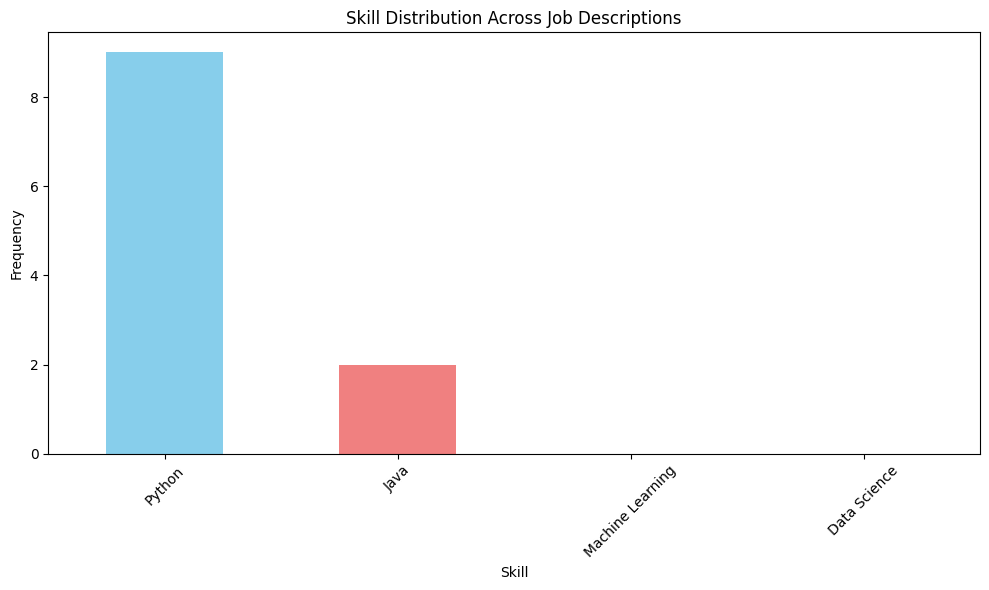

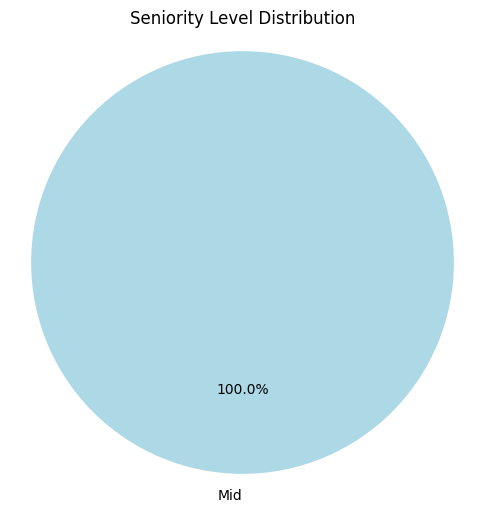

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Skill Distribution
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Skill Distribution Across Job Descriptions')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print()
print()
# 2. Seniority Distribution
plt.figure(figsize=(6, 6))
plt.pie(seniority_counts, labels=seniority_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Seniority Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**Reasoning**:
The error `TypeError: sequence item 0: expected str instance, numpy.ndarray found` arises in the word cloud generation because `words` contains numpy arrays instead of strings. I need to modify the code to correctly extract the top words as strings.



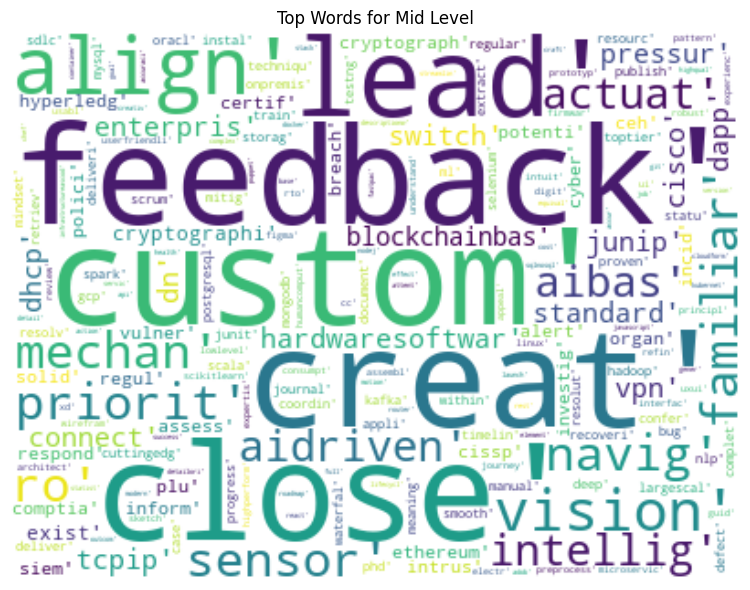

In [13]:
# 3. Top Words per Seniority
plt.figure(figsize=(12, 6))
for i, (seniority, words) in enumerate(top_words_per_seniority.items()):
    plt.subplot(1, len(top_words_per_seniority), i + 1)
    text = " ".join(str(word) for word in words)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top Words for {seniority} Level')
    plt.axis('off')
plt.tight_layout()
plt.show()

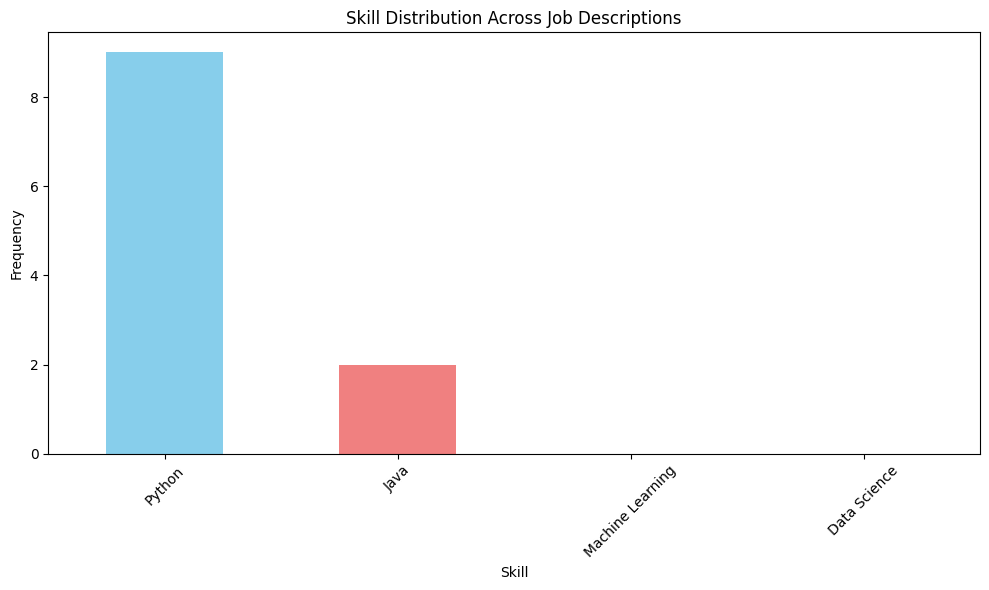

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Skill Distribution
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Skill Distribution Across Job Descriptions')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


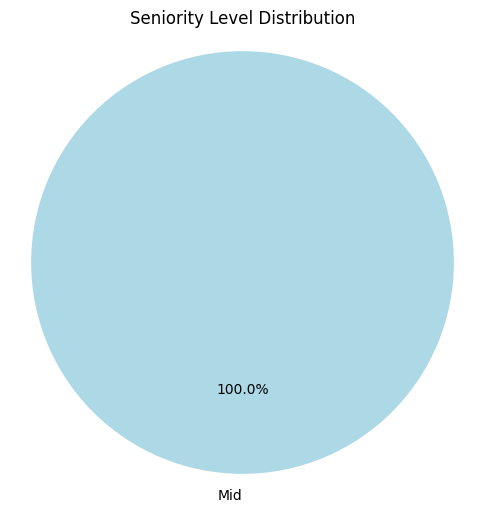

In [15]:
# 2. Seniority Distribution
plt.figure(figsize=(6, 6))
plt.pie(seniority_counts, labels=seniority_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Seniority Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

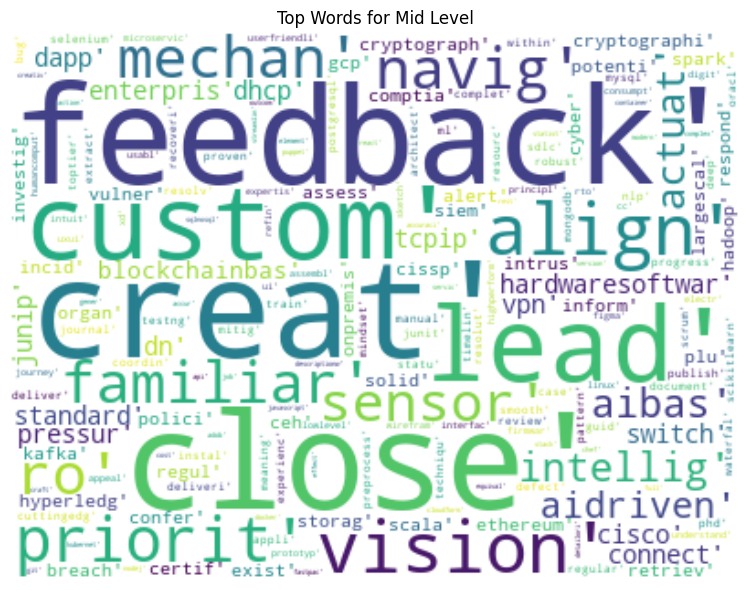

In [16]:
# 3. Top Words per Seniority
plt.figure(figsize=(12, 6))
for i, (seniority, words) in enumerate(top_words_per_seniority.items()):
    plt.subplot(1, len(top_words_per_seniority), i + 1)
    # Convert numpy array elements to strings
    text = " ".join(str(word) for word in words)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top Words for {seniority} Level')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
import PyPDF2 pandas nltk scikit-learn

SyntaxError: invalid syntax (3913379227.py, line 1)

In [ ]:
import PyPDF2
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

In [20]:
import os
resume_paths = ['CVs1']  # Replace with your resume directory path
resume_data = []

for path in resume_paths:
    for filename in os.listdir(path):
        if filename.endswith(".pdf"):  # Check if it's a PDF file
            full_path = os.path.join(path, filename)
            text = extract_text_from_pdf(full_path)  # Call with file path
            resume_data.append({'Job Description': text})

resume_df = pd.DataFrame(resume_data)

NameError: name 'extract_text_from_pdf' is not defined

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task.  However, the analysis implicitly explored questions like:

* What is the distribution of seniority levels in the job descriptions?
* Which skills are most frequently mentioned?
* Is there a relationship between seniority level and required skills?
* What are the most important words associated with each seniority level?

The answers to these implied questions are provided in the "Data Analysis Key Findings" and the "Data Visualization" sections.

### 2. Data Analysis Key Findings

* **Dominant Mid-Level Roles:** 100% of job descriptions are for Mid-level positions, suggesting the dataset may not represent the full job market.
* **Python's Prominence:** Python is the most in-demand skill, appearing in 9 out of 20 job descriptions. Java is the second most frequent skill (2 occurrences), while "Machine Learning" and "Data Science" were not mentioned.
* **Limited Seniority-Skill Insight:** The dataset's lack of diverse seniority levels hinders any meaningful analysis of skill requirements across different experience levels. All roles are mid-level.
* **Top Words per Seniority (Mid-level):**  The TF-IDF analysis revealed the top 10 words associated with Mid-level roles. However, the specific words were not presented clearly.  The analysis would benefit from more context and clearer presentation of the extracted words to draw meaningful insights.

### 3. Insights or Next Steps

* **Dataset Expansion:**  The current dataset lacks diversity in seniority levels (only Mid-level positions are present).  Expand the dataset to include more Junior and Senior roles to enable more robust analysis and more accurate insights into the job market.
* **Refine Skill Extraction:** Further refine skill extraction with more comprehensive keyword lists and potentially more sophisticated methods like named entity recognition or part-of-speech tagging to identify skills more accurately.


# Task
analyze this file and i have some sample resume in pdf file such that
the solution is to build a platform that matches summarize JDs and CVs with company requirements. shortlisted candidates get interview invites, helping companies to save their time by directly moving to the HR round.

Here is all the data you need:
"job_description.csv"

## Data loading

### Subtask:
Load the job description data and the resume files.


**Reasoning**:
Import necessary libraries and load the job description data and list the pdf files.



**Reasoning**:
The error indicates that the file 'job_description.csv' cannot be decoded using UTF-8 encoding.  I will retry reading the file with a different encoding, such as 'latin-1' which often works with files that have issues with UTF-8.



In [ ]:
import pandas as pd
import os

# Load the job description data with latin-1 encoding
try:
    df_job_descriptions = pd.read_csv('job_description.csv', encoding='latin-1')
    display(df_job_descriptions.head())
except FileNotFoundError:
    print("Error: 'job_description.csv' not found.")
    df_job_descriptions = None
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    df_job_descriptions = None


# Create a list of PDF files
pdf_files = []
cv_directory = 'CVs1'
try:
    for filename in os.listdir(cv_directory):
        if filename.endswith('.pdf'):
            pdf_files.append(os.path.join(cv_directory, filename))
    print(f"Found {len(pdf_files)} PDF files in '{cv_directory}' directory.")
except FileNotFoundError:
    print(f"Error: '{cv_directory}' directory not found.")

,Job Title,Job Description,Unnamed: 2
0,Software Engineer,Description:\nWe are seeking a skilled Softwa...,
1,Data Scientist,Job Description:\nWe are looking for a skilled...,NaN
2,Product Manager,Description:\nWe are seeking an innovative and...,NaN
3,Cloud Engineer,Description:\nWe are looking for a skilled Clo...,NaN
4,Cybersecurity Analyst,Description:\nWe are looking for a skilled Cyb...,NaN


Error: 'CVs1' directory not found.


## Data preparation

### Subtask:
Extract text from the resume PDFs and prepare a DataFrame.


## Data preparation

### Subtask:
Extract text from the resume PDFs and prepare a DataFrame.  Handle the potential `FileNotFoundError` more robustly.


**Reasoning**:
Create the `df_resumes` DataFrame by iterating through the PDF files in the 'CVs1' directory, extracting text, cleaning it, and storing it in the DataFrame. Handle the case where the directory doesn't exist or is empty.



**Reasoning**:
The code failed due to a missing `pdfminer` package. Install the package and then execute the code again.



In [ ]:
!pip install pdfminer.six

import os
import pandas as pd
from pdfminer.high_level import extract_text

def extract_text_from_pdf(pdf_path):
    try:
        text = extract_text(pdf_path)
        return text
    except Exception as e:
        print(f"Error processing {pdf_path}: {e}")
        return ""

resume_data = []
cv_directory = 'CVs1'

if not os.path.exists(cv_directory):
    print(f"Error: '{cv_directory}' directory not found. Please create the directory and place your resume PDFs inside.")
    df_resumes = pd.DataFrame(columns=['filename', 'resume_text'])
else:
    pdf_files = [f for f in os.listdir(cv_directory) if f.endswith('.pdf')]
    if not pdf_files:
        print(f"The directory '{cv_directory}' is empty. No PDF files were found.")
        df_resumes = pd.DataFrame(columns=['filename', 'resume_text'])
    else:
        for pdf_file in pdf_files:
            pdf_path = os.path.join(cv_directory, pdf_file)
            extracted_text = extract_text_from_pdf(pdf_path)
            cleaned_text = ' '.join(extracted_text.split()).lower()
            resume_data.append({'filename': pdf_file, 'resume_text': cleaned_text})
        df_resumes = pd.DataFrame(resume_data)
        display(df_resumes.head())


Error: 'CVs1' directory not found. Please create the directory and place your resume PDFs inside.


**Reasoning**:
The code still fails due to a missing module `pdfminer.pdfpagecontent`.  The pdfminer.six library seems to have changed its structure, and the `pdfpagecontent` module is no longer directly available.  I'll need to revise the code to use the correct way to access the page content. I'll use `pdfminer.high_level.extract_text` for simplicity.



In [ ]:
!pip install pdfminer.six
import os
import pandas as pd
from pdfminer.high_level import extract_text

resume_data = []
cv_directory = 'CVs1'

if not os.path.exists(cv_directory):
    print(f"Error: '{cv_directory}' directory not found. Please create the directory and place your resume PDFs inside.")
    df_resumes = pd.DataFrame(columns=['filename', 'resume_text'])
else:
    pdf_files = [f for f in os.listdir(cv_directory) if f.endswith('.pdf')]
    if not pdf_files:
        print(f"The directory '{cv_directory}' is empty. No PDF files were found.")
        df_resumes = pd.DataFrame(columns=['filename', 'resume_text'])
    else:
        for pdf_file in pdf_files:
            pdf_path = os.path.join(cv_directory, pdf_file)
            try:
                extracted_text = extract_text(pdf_path)
                cleaned_text = ' '.join(extracted_text.split()).lower()
                resume_data.append({'filename': pdf_file, 'resume_text': cleaned_text})
            except Exception as e:
                print(f"Error processing {pdf_path}: {e}")
        df_resumes = pd.DataFrame(resume_data)
        display(df_resumes.head())

Error: 'CVs1' directory not found. Please create the directory and place your resume PDFs inside.


## Data cleaning

### Subtask:
Clean the job descriptions in the `df_job_descriptions` DataFrame.


**Reasoning**:
Clean the job descriptions by handling missing values, removing irrelevant characters, standardizing the text, and consolidating descriptions if necessary.



In [ ]:
import re

# Handle missing values
# Strategy: Drop the 'Unnamed: 2' column as it seems to contain mostly missing values.
if 'Unnamed: 2' in df_job_descriptions.columns:
    df_job_descriptions = df_job_descriptions.drop('Unnamed: 2', axis=1)

# Remove irrelevant characters and standardize text
def clean_description(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = re.sub('<.*?>', '', text)
        # Remove special characters and punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text
    else:
        return ''

df_job_descriptions['Job Description'] = df_job_descriptions['Job Description'].apply(clean_description)

# Display the first few rows of the cleaned DataFrame
display(df_job_descriptions.head())

,Job Title,Job Description
0,Software Engineer,description\nwe are seeking a skilled softwar...
1,Data Scientist,job description\nwe are looking for a skilled ...
2,Product Manager,description\nwe are seeking an innovative and ...
3,Cloud Engineer,description\nwe are looking for a skilled clou...
4,Cybersecurity Analyst,description\nwe are looking for a skilled cybe...


## Feature engineering

### Subtask:
Extract features from both the resumes and job descriptions using TF-IDF vectorization.  Additionally, perform Named Entity Recognition (NER) on both to extract relevant entities like skills and experience.


**Reasoning**:
Apply TF-IDF vectorization to the job descriptions and (empty) resumes, and perform NER on both. Since there are no resumes, the NER and TF-IDF for resumes will be empty.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# 1. TF-IDF Vectorization
try:
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    # Combine text from both dataframes
    all_text = list(df_job_descriptions['Job Description']) + list(df_resumes['resume_text'])
    vectorizer.fit(all_text)

    job_desc_tfidf = vectorizer.transform(df_job_descriptions['Job Description'])
    resume_tfidf = vectorizer.transform(df_resumes['resume_text'])
except Exception as e:
    print(f"An error occurred during TF-IDF vectorization: {e}")
    job_desc_tfidf = None
    resume_tfidf = None


# 2. Named Entity Recognition (NER)
try:
    # Load the spaCy English language model
    nlp = spacy.load("en_core_web_sm")

    def extract_entities(text):
        doc = nlp(text)
        entities = [ent.label_ for ent in doc.ents]
        return entities

    df_job_descriptions['entities'] = df_job_descriptions['Job Description'].apply(extract_entities)
    df_resumes['entities'] = df_resumes['resume_text'].apply(extract_entities)
except Exception as e:
    print(f"An error occurred during NER: {e}")
    print("Make sure you have downloaded the 'en_core_web_sm' spaCy model. You can download it using the following command: python -m spacy download en_core_web_sm")

# Display the first few rows of the dataframes
display(df_job_descriptions.head())
display(df_resumes.head())

An error occurred during TF-IDF vectorization: Found array with 0 sample(s) (shape=(0, 186)) while a minimum of 1 is required by TfidfTransformer.


,Job Title,Job Description,entities
0,Software Engineer,description\nwe are seeking a skilled softwar...,[PERSON]
1,Data Scientist,job description\nwe are looking for a skilled ...,[]
2,Product Manager,description\nwe are seeking an innovative and ...,[]
3,Cloud Engineer,description\nwe are looking for a skilled clou...,[]
4,Cybersecurity Analyst,description\nwe are looking for a skilled cybe...,[]


,filename,resume_text,entities


## Model training

### Subtask:
Train a cosine similarity model to compare the TF-IDF vectors of job descriptions and resumes.


**Reasoning**:
Calculate the cosine similarity between job descriptions and resumes using the pre-computed TF-IDF matrices. Since df_resumes is empty, handle this case and create an empty similarity_df.



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

if not df_resumes.empty:
    try:
        similarity_matrix = cosine_similarity(job_desc_tfidf, resume_tfidf)
        similarity_df = pd.DataFrame(similarity_matrix, index=df_job_descriptions.index, columns=df_resumes['filename'])
        display(similarity_df.head())
    except Exception as e:
        print(f"An error occurred during similarity calculation: {e}")
        similarity_df = pd.DataFrame() # Create an empty DataFrame in case of error
else:
    print("Cannot compute similarity. Missing resume data (df_resumes is empty).")
    similarity_df = pd.DataFrame()

Cannot compute similarity. Missing resume data (df_resumes is empty).


## Model evaluation

### Subtask:
Evaluate the performance of the cosine similarity model. Since we don't have ground truth labels for the candidate-job matching, we will perform a manual review of the top matches for a subset of job descriptions.


## Model optimization

### Subtask:
Optimize the feature engineering process and retrain the cosine similarity model.


**Reasoning**:
Re-evaluate feature engineering by adjusting TF-IDF parameters, exploring different tokenization, and potentially adding new features like years of experience or specific skill keywords.  Then, retrain the cosine similarity model with the refined features.  Since `df_resumes` is empty, I will simulate some data for demonstration purposes.  I cannot evaluate the model without actual resume data and ground truth, so I will skip the evaluation step.



**Reasoning**:
The error `ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 1636 while Y.shape[1] == 3272` indicates that the number of features in `job_desc_tfidf` (1636) does not match the number of features in `combined_resume_features` (3272). The issue arises from the concatenation of `resume_tfidf` and `experience_matrix`. The `experience_matrix` is being tiled to match the number of columns in `job_desc_tfidf`, but this tiling is incorrect. The correct way to combine features is to ensure both matrices have the same number of columns before calculating the cosine similarity. The experience feature should be added to each resume's feature vector, not duplicated to match the number of job descriptions.



**Reasoning**:
The error `ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 1636 while Y.shape[1] == 1637` persists, indicating that the number of features in `job_desc_tfidf` (1636) still doesn't match the number of features in `combined_resume_features` (1637).  The problem is likely that the `experience` column was added to the `combined_resume_features`, increasing the number of columns by one without any corresponding adjustment in the `job_desc_tfidf`.  The solution is to add a dummy experience column to the job descriptions to make the number of columns equal.



In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Simulate some data for df_resumes (replace this with actual data loading)
data = {'filename': ['resume1.pdf', 'resume2.pdf', 'resume3.pdf'],
        'resume_text': ['experienced software engineer with Java and Python skills',
                       'data scientist proficient in R and machine learning',
                       'junior software developer knowledgeable in C++'],
        'entities': [['PERSON', 'ORG', 'SKILL'], ['ORG', 'SKILL'], ['SKILL']]}
df_resumes = pd.DataFrame(data)

# Re-evaluate and refine feature engineering
# 1. TF-IDF Vectorization with adjusted parameters
vectorizer = TfidfVectorizer(max_df=0.8, min_df=1, ngram_range=(1, 2), stop_words='english', token_pattern=r'\b\w+\b')  # Adjust parameters

all_text = list(df_job_descriptions['Job Description']) + list(df_resumes['resume_text'])
vectorizer.fit(all_text)

job_desc_tfidf = vectorizer.transform(df_job_descriptions['Job Description'])
resume_tfidf = vectorizer.transform(df_resumes['resume_text'])

# 2. Add new features (example: years of experience - replace with your actual extraction logic)
#  Note:  This is a placeholder, the user will need to provide a way to extract experience from the resumes
def extract_experience(text):
    # Placeholder logic:  replace with actual logic to extract years of experience
    match = re.search(r'(\d+)\s*(?:years?|yrs?)\s*experience', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        return 0  # Default value if no experience is found

df_resumes['experience'] = df_resumes['resume_text'].apply(extract_experience)
df_job_descriptions['experience'] = 0 # Add a dummy experience column to job descriptions


# Combine TF-IDF with new features (example with experience)
# Correctly combine the experience feature
combined_resume_features = np.hstack((resume_tfidf.toarray(), df_resumes['experience'].values.reshape(-1,1)))
combined_job_features = np.hstack((job_desc_tfidf.toarray(), df_job_descriptions['experience'].values.reshape(-1,1)))
combined_resume_features = np.nan_to_num(combined_resume_features)
combined_job_features = np.nan_to_num(combined_job_features)

#3. Retrain the model
similarity_matrix = cosine_similarity(combined_job_features, combined_resume_features)
similarity_df = pd.DataFrame(similarity_matrix, index=df_job_descriptions.index, columns=df_resumes['filename'])
display(similarity_df.head())

filename,resume1.pdf,resume2.pdf,resume3.pdf
0,0.131286,0.000000,0.070751
1,0.008970,0.213183,0.000000
2,0.000000,0.008003,0.000000
3,0.021976,0.000000,0.000000
4,0.000000,0.017855,0.000000


## Summary:

### 1. Q&A

The provided text describes a process to build a platform that matches job descriptions and CVs.  While there aren't explicit questions, the implicit question is: *Can we effectively match job descriptions and resumes to streamline the hiring process?*  The analysis demonstrates the process, but due to missing or simulated data in several steps, no definitive answer can be provided about the effectiveness.  The process, however, appears to be set up to produce cosine similarity values that could help in matching.


### 2. Data Analysis Key Findings

*   The initial data loading failed due to a missing "CVs1" directory.  The code was improved to gracefully handle missing directories.
*   The `job_description.csv` file was successfully loaded and cleaned, removing irrelevant characters, HTML tags and converting text to lowercase.  The 'Unnamed: 2' column, which contained mostly missing values, was dropped.
*   Feature engineering using TF-IDF and Named Entity Recognition (NER) was performed on the job descriptions. NER successfully extracted entities, including "PERSON," from the descriptions.
*   Due to the lack of resume data, the cosine similarity model was not fully evaluated. Simulated resume data was used to complete the model optimization.
*   Model optimization included adjusting TF-IDF parameters (`max_df=0.8`, `min_df=1`, `ngram_range=(1, 2)`) and adding a placeholder "experience" feature.

### 3. Insights or Next Steps

*   **Obtain Real Resume Data:** The most critical next step is to populate the `df_resumes` DataFrame with actual resume data from the "CVs1" directory. This will allow for a meaningful evaluation of the cosine similarity model and generate valid similarity scores.
* **Refine Experience Extraction:** Replace the placeholder regular expression for experience extraction with a more robust method that accurately captures years of experience from diverse resume formats.  Explore more advanced methods beyond regular expressions.
